# Applying Clustering Algorithms to Find Geographically Similar Headlines

### Objective

Cluster (find groups of) headlines based on the geographic coordinates using both k-means clustering and DBSCAN. Visualize the clusters on a world map to check the results. Try different parameters and distance measures in the algorithms to produce better clusters

In [1]:
from sklearn.cluster import KMeans
from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_json("data/chapter2-data.json")

In [2]:
#let's verify we have data
data.head()

,headline,cities,latitude,longitude,country_code
0,Zika Outbreak Hits Miami,Miami,25.77427,-80.19366,US
1,Could Zika Reach New York City?,New York City,40.71427,-74.00597,US
2,First Case of Zika in Miami Beach,Miami Beach,25.79065,-80.13005,US
3,"Mystery Virus Spreads in Recife, Brazil",Recife,-8.05389,-34.88111,BR
4,Dallas man comes down with case of Zika,Dallas,32.78306,-96.80667,US


In [3]:
#  no NaN values
data[data["longitude"]==np.NaN]

,headline,cities,latitude,longitude,country_code


Text(0.5, 1.0, 'example scatter of lat/long')

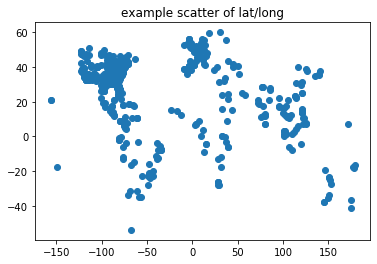

In [4]:
plt.scatter(data['longitude'], data['latitude'])
plt.title("example scatter of lat/long")

**Note:**
A mistake I made was presuming that X would be represented by the latitudes and the Y by the longitudes. Apparently it's the other way around

### Let's try and find how many clusters there would be using inertia values

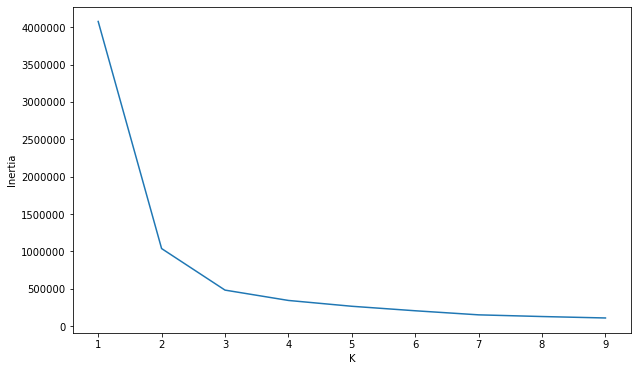

In [5]:
cities = list(zip(data["longitude"],data["latitude"]))
# cities = list(zip(data["latitude"], data["longitude"]))

k_values = range(1, 10)
inertia_values = [KMeans(k).fit(cities).inertia_
                  for k in k_values]

plt.figure(figsize=(10, 6))

plt.plot(k_values, inertia_values)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

I would say we have about 3 (maybe 4) big clusters on the world map. But does it translate well locally, eg to places in Europe, Asia etc...?

In [6]:
cluster_size=3
cluster_model = KMeans(n_clusters=cluster_size)
assigned_city_clusters = cluster_model.fit_predict(cities)

print(f"We have a total of {len(cities)} cities")
print("City cluster index assignments example:")
print(assigned_city_clusters[0:50])

We have a total of 608 cities
City cluster index assignments example:
[1 1 1 2 1 1 1 2 1 1 1 1 1 1 0 0 1 1 1 1 1 1 2 0 1 1 2 1 0 0 2 0 0 1 1 1 0
 0 0 1 1 1 1 1 1 1 0 2 1 1]


**Let's add the cluster indices to our dataframe as a new column**

In [8]:
data['kmeans_index'] = pd.Series(assigned_city_clusters)
data.head()

,headline,cities,latitude,longitude,country_code,kmeans_index
0,Zika Outbreak Hits Miami,Miami,25.77427,-80.19366,US,1.0
1,Could Zika Reach New York City?,New York City,40.71427,-74.00597,US,1.0
2,First Case of Zika in Miami Beach,Miami Beach,25.79065,-80.13005,US,1.0
3,"Mystery Virus Spreads in Recife, Brazil",Recife,-8.05389,-34.88111,BR,2.0
4,Dallas man comes down with case of Zika,Dallas,32.78306,-96.80667,US,1.0


In [10]:
missing = data["kmeans_index"].isna().sum()
print(f"We have {missing} values with NaN")

We have 39 values with NaN


**Let's find out why there are NaN's after the fitting**

In [11]:
#Let's get one row with nan
data[data["kmeans_index"].isna()].head(1)

,headline,cities,latitude,longitude,country_code,kmeans_index
608,How to Avoid Hepatitis B in Trenton,Trenton,40.21705,-74.74294,US,NaN


In [12]:
# Maybe there's a duplicate?
data[data["latitude"]==40.21705]

,headline,cities,latitude,longitude,country_code,kmeans_index
608,How to Avoid Hepatitis B in Trenton,Trenton,40.21705,-74.74294,US,NaN


Nope...

In [13]:
data[data["kmeans_index"].isna()].head(1)["latitude"]
data[data["kmeans_index"].isna()].head(1)["longitude"]

608   -74.74294
Name: longitude, dtype: float64

In [14]:
data.tail(50)

,headline,cities,latitude,longitude,country_code,kmeans_index
594,The Spread of Hepatitis E in Fargo has been Co...,Fargo,46.87719,-96.78980,US,1.0
595,Zika Outbreak in Mexicali,Mexicali,32.62781,-115.45446,MX,1.0
596,West Nile Virus Keeps Spreading in Hauppauge,Hauppauge,40.82565,-73.20261,US,1.0
597,Bronchitis Keeps Spreading in Hayward,Hayward,37.66882,-122.08080,US,2.0
600,Zika spreads to Plant City,Plant City,28.01888,-82.11469,US,1.0
601,Chlamydia Exposure in Sanaa,Sanaa,15.35472,44.20667,YE,1.0
602,Zika Reported in North Miami Beach,North Miami Beach,25.93315,-80.16255,US,2.0
603,More Patients in Kensington are Getting Diagno...,Kensington,40.64621,-73.97069,US,2.0
605,Case of West Nile Virus Reported in Riverside,Riverside,33.95335,-117.39616,US,0.0
606,Northfield Encounters Severe Symptoms of Herpes,Northfield,44.45830,-93.16160,US,1.0


Let's predict a value...

In [15]:
cluster_model.predict([[40.21705,74.74294]])

array([2])

It does predict correctly

In [16]:
(608-39)/608

0.9358552631578947

**Let's continue...**

In [17]:
list(range(cluster_size))

[0, 1, 2]

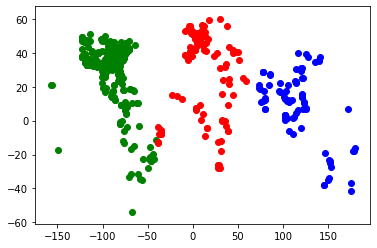

In [18]:
for cluster_index in range(cluster_size):
    selected_cities = [cities[i] for i in range(len(cities))
                      if cluster_index == assigned_city_clusters[i]]
    x_coordinates, y_coordinates = np.array(selected_cities).T
    plt.scatter(x_coordinates, y_coordinates,
                color=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'][cluster_index])
plt.show()

**Let's try to map the color coded coordinates to the world basemap:**

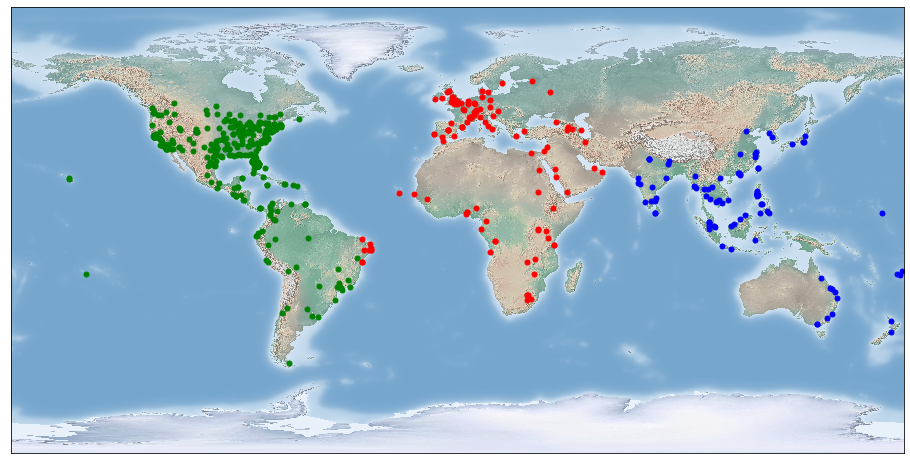

In [19]:
map_plotter = Basemap(projection='cyl')

fig = plt.figure(figsize=(16, 9))

longitudes, latitudes = np.array(cities).T

for cluster_index in range(cluster_size):
    selected_cities = [cities[i] for i in range(len(cities))
                      if cluster_index == assigned_city_clusters[i]]
    x_coordinates, y_coordinates = np.array(selected_cities).T
    map_plotter.scatter(x_coordinates, y_coordinates,latlon=True,s=25,alpha=1,
                color=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'][cluster_index])

# map_plotter.drawcoastlines()
# map_plotter.drawcountries()
map_plotter.shadedrelief()

plt.show()

The coordinates clearly align with the locations on the map.

**Let's try an orthographic view of Europe**

In [20]:
# Putting this example in comment, shows orthographic view when uncommented, but distract from the current example

# fig = plt.figure(figsize=(16, 9))
# map_ortho = Basemap(projection='ortho', lat_0=54, lon_0=25)
# map_ortho.scatter(longitudes, latitudes, latlon=True,s=40,color='r')
# map_ortho.drawcoastlines()
# plt.show()

**Let's see if clusters match up to the headlines**

In [21]:
counts = data["kmeans_index"].value_counts()
counts

1.0    366
2.0    113
0.0     90
Name: kmeans_index, dtype: int64

In [22]:
counts.to_numpy().sum()

569

**Strangely not every headline got assigned a cluster**

In [23]:
data[data["kmeans_index"]==0]

,headline,cities,latitude,longitude,country_code,kmeans_index
14,"Zika alert aEUR"" Manila now threatened",Manila,14.60420,120.98220,PH,0.0
15,Zika afflicts 7 in Iloilo City,Iloilo,10.69694,122.56444,PH,0.0
23,Baltimore plans for Zika virus,Baltimore,39.29038,-76.61219,US,0.0
28,Scientists in Paris to look for answers,Paris,48.85341,2.34880,FR,0.0
29,Key Zika Findings in San Diego Institute,San Diego,32.71571,-117.16472,US,0.0
31,Beijing team cracks Zika secret,Beijing,39.90750,116.39723,CN,0.0
32,Zika spreading to Salvador,Salvador,-12.97111,-38.51083,BR,0.0
36,Zika Virus Reaches San Francisco,San Francisco,37.77493,-122.41942,US,0.0
37,New Vaccine on Trial in Bethesda District,Bethesda,38.98067,-77.10026,US,0.0
38,Townsville Zika tests inconclusive,Townsville,-19.26639,146.80569,AU,0.0


Doesn't really seem all that related, although lots of ZIKA.. While many are in Amerika, we have some European locations too in the first cluster?!

In [24]:
data[data["country_code"]=="ES"]

,headline,cities,latitude,longitude,country_code,kmeans_index
118,Spanish Flu Outbreak in Barcelona,Barcelona,41.38879,2.15899,ES,1.0
249,Mad Cow case in Murcia,Murcia,37.98704,-1.13004,ES,1.0
309,Spanish flu spreading in Madrid,Madrid,40.41650,-3.70256,ES,2.0
310,Rabies Hits Madrid,Madrid,40.41650,-3.70256,ES,1.0
469,Durango is infested with Hepatitis B,Durango,43.17124,-2.63380,ES,2.0
484,Spanish Flu Spreading through Madrid,Madrid,40.41650,-3.70256,ES,0.0
485,Barcelona Struck by Spanish Flu,Barcelona,41.38879,2.15899,ES,1.0
487,Spanish Flu Spreading through Madrid,Madrid,40.41650,-3.70256,ES,0.0
488,Barcelona Struck by Spanish Flu,Barcelona,41.38879,2.15899,ES,1.0
639,New medicine wipes out Meningitis in Sevilla,Sevilla,37.38283,-5.97317,ES,NaN


## Let's continue with DBScan

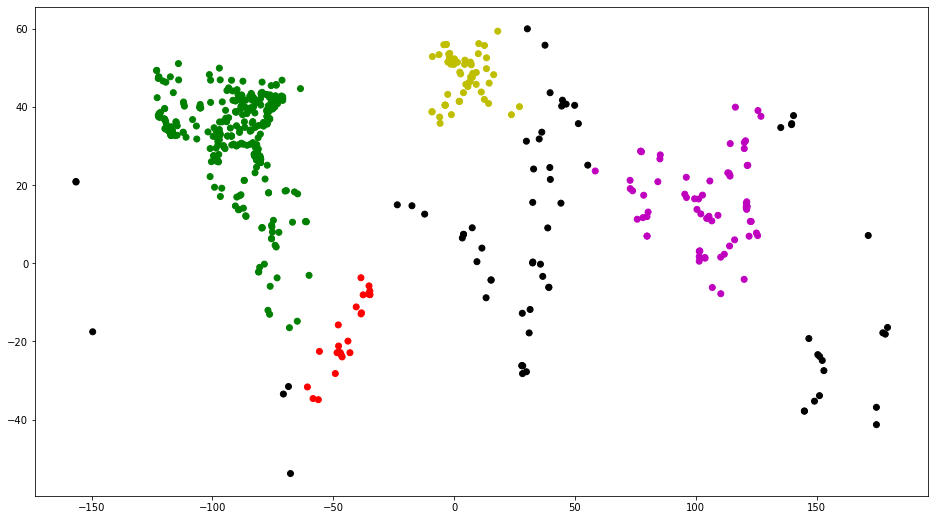

In [56]:
from sklearn.cluster import DBSCAN

# basic settings for dbscan
epsilon = 15#0.1
min_points = 15

# create model and clusters
cluster_model = DBSCAN(eps=epsilon, min_samples=min_points)
city_clusters = cluster_model.fit_predict(cities)

colors = [['g','y', 'r','m','c','b','k'][cluster] for cluster in city_clusters]
fig = plt.figure(figsize=(16, 9))
plt.scatter(longitudes, latitudes, color=colors)
plt.show()